In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

df =pd.read_csv('SwissData_Customers_Cleaned.csv')
df.head()


,CustomerID,Name,Age,Gender,Location,AnnualIncome,InvestmentAmountLast12M,NumberOfInvestmentsLast12M,RiskTolerance,InteractionScore,CustomerTenure,SatisfactionScore,Churned,SignupDate,AvgInvestmentSize,InvestmentActivityScore,RiskScore
0,1,Customer_1,63,Female,Bern,177037.463259,36753.255346,2.0,High,7,6,7,0,2022-02-19,18376.627673,257272.787424,3
1,2,Customer_2,53,Female,Basel,172328.963113,41549.968750,5.0,Medium,6,3,4,0,2023-07-13,8309.993750,249299.812502,2
2,3,Customer_3,39,Male,Lausanne,98868.841064,6907.589507,4.0,Medium,56,8,10,1,2022-06-02,1726.897377,386825.012417,2
3,4,Customer_4,67,Female,Bern,160564.197251,14325.553768,3.0,Medium,64,10,9,0,2021-12-30,4775.184589,916835.441130,2
4,5,Customer_5,32,Male,Lausanne,128465.639100,19546.580173,9.0,High,50,11,9,0,2022-12-11,2171.842241,977329.008653,3


/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


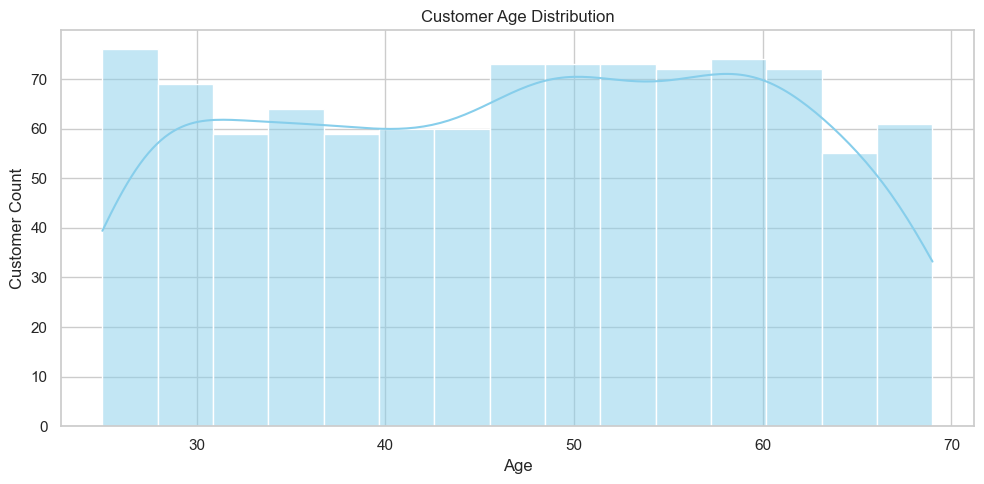

 Age Distribution – Key Insights:
- The majority of the customer portfolio is in the 30–50 age range.
- Customers over 50 are fewer in number but typically have higher investment capacity.
- Age-based segmentation can help personalize investment offers and risk strategies.



/Users/melekikiz/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


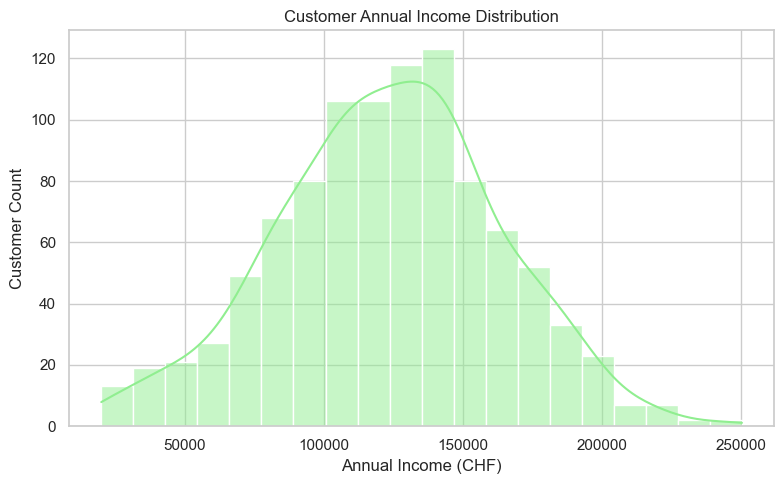

 Income Distribution – Key Insights:
- Most customers have an annual income between CHF 80,000–150,000.
- Upper-income clients may represent high-potential investment opportunities.
- Product and portfolio recommendations can be tailored based on income levels.



In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.savefig("reports/plots/customer_age.png", dpi=300)
plt.show()


print(" Age Distribution – Key Insights:")
print("- The majority of the customer portfolio is in the 30–50 age range.")
print("- Customers over 50 are fewer in number but typically have higher investment capacity.")
print("- Age-based segmentation can help personalize investment offers and risk strategies.\n")

plt.figure(figsize=(8,5))
sns.histplot(df['AnnualIncome'], bins=20, kde=True, color='lightgreen')
plt.title("Customer Annual Income Distribution")
plt.xlabel("Annual Income (CHF)")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.savefig("reports/plots/annualincome.png", dpi=300)
plt.show()

print(" Income Distribution – Key Insights:")
print("- Most customers have an annual income between CHF 80,000–150,000.")
print("- Upper-income clients may represent high-potential investment opportunities.")
print("- Product and portfolio recommendations can be tailored based on income levels.\n")


/var/folders/73/7m_fc6rx7k7cfh_j6tx4883c0000gn/T/ipykernel_31900/2594603461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RiskTolerance', y='InvestmentAmountLast12M', data=df, estimator=sum, ci=None, palette='pastel')


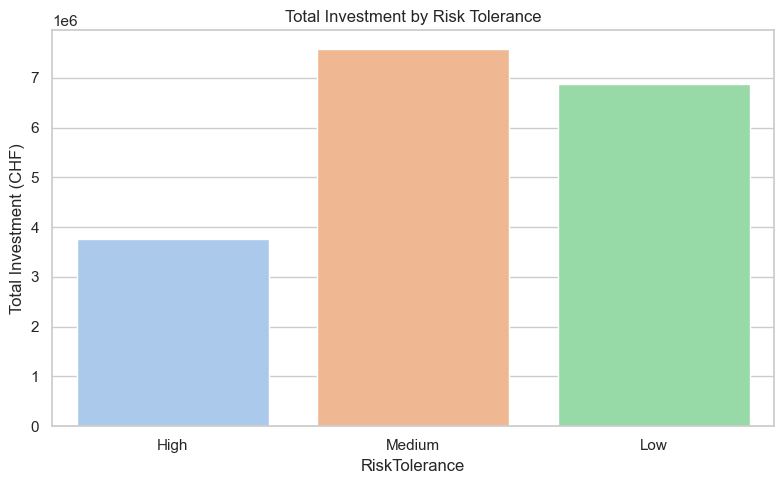

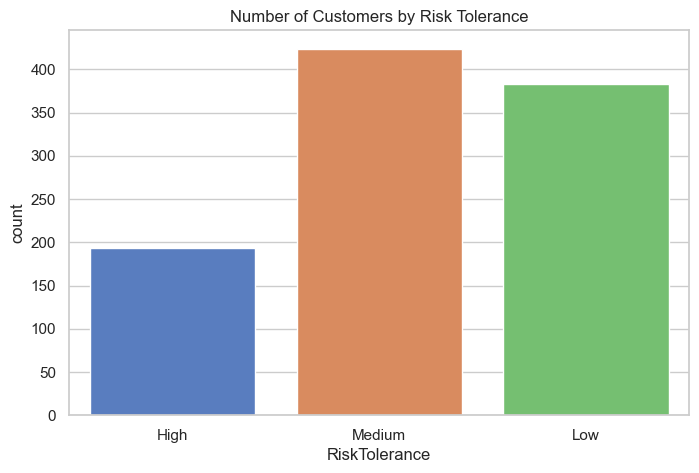

 Risk Tolerance – Key Insights:
- Clients with a high risk tolerance contribute significantly to total investment.
- Low and medium risk clients are more common but invest smaller amounts overall.
- Risk tolerance is a crucial factor for identifying customer potential.



In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x='RiskTolerance', y='InvestmentAmountLast12M', data=df, estimator=sum, ci=None, palette='pastel')
plt.title("Total Investment by Risk Tolerance")
plt.ylabel("Total Investment (CHF)")
plt.tight_layout()
plt.savefig("reports/plots/totalinvestmentbyrisk.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='RiskTolerance', data=df, palette='muted')
plt.title("Number of Customers by Risk Tolerance")
plt.show()

print(" Risk Tolerance – Key Insights:")
print("- Clients with a high risk tolerance contribute significantly to total investment.")
print("- Low and medium risk clients are more common but invest smaller amounts overall.")
print("- Risk tolerance is a crucial factor for identifying customer potential.\n")


/var/folders/73/7m_fc6rx7k7cfh_j6tx4883c0000gn/T/ipykernel_31900/2812593665.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='InvestmentAmountLast12M', data=df, estimator=sum, ci=None, palette='cool')


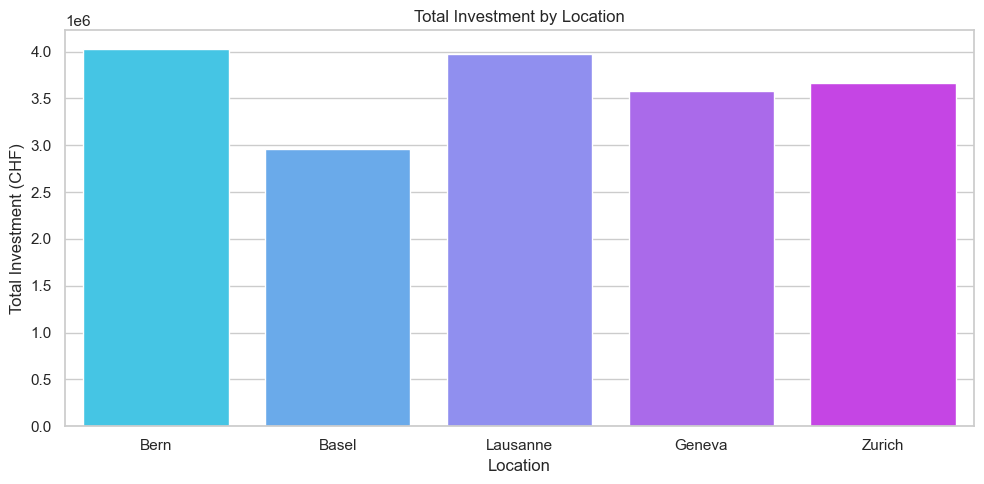

 Location-Based Insights:
- Customers from Zurich and Geneva stand out with the highest total investments.
- Regional strategies could be developed to strengthen engagement in top-performing cities.



In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='Location', y='InvestmentAmountLast12M', data=df, estimator=sum, ci=None, palette='cool')
plt.title("Total Investment by Location")
plt.ylabel("Total Investment (CHF)")
plt.tight_layout()
plt.savefig("reports/plots/investmentbylocation.png", dpi=300)
plt.show()

print(" Location-Based Insights:")
print("- Customers from Zurich and Geneva stand out with the highest total investments.")
print("- Regional strategies could be developed to strengthen engagement in top-performing cities.\n")


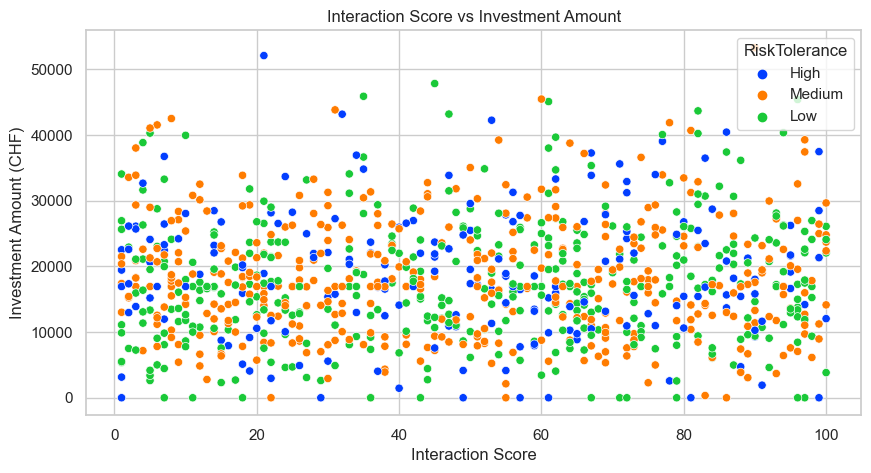

 Interaction Score Analysis – Key Insights:
- Higher engagement scores are generally associated with higher investment volumes.
- High-risk clients often display both high interaction and investment activity.
- This relationship can guide targeted marketing and personalized advisory efforts.



In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='InteractionScore', y='InvestmentAmountLast12M', hue='RiskTolerance', data=df, palette='bright')
plt.title("Interaction Score vs Investment Amount")
plt.xlabel("Interaction Score")
plt.ylabel("Investment Amount (CHF)")
plt.show()

print(" Interaction Score Analysis – Key Insights:")
print("- Higher engagement scores are generally associated with higher investment volumes.")
print("- High-risk clients often display both high interaction and investment activity.")
print("- This relationship can guide targeted marketing and personalized advisory efforts.\n")
